In [49]:
from matplotlib.pyplot import * 
#from numpy import *
import nested_res_V4p5 as nr
import glob
import pandas as pd
import os

%matplotlib inline
#%matplotlib widget


###########################################################
#                                                         #
#         WELCOME TO NESTED_FIT RESULT ANALYSIS           #
#                                                         #
#                                                         #
# Start with                                              #
# 'an=nested_res_V4p5.Analysis()'                         #
# By default the current path is considered.              #
#                                                         #
# If you want analyze another path:                       #
# 'an=nested_res_V4p5.Analysis(path="path")'              #
#                                                         #
# If you do not want to specify any path:                 #
# 'an=nested_res.Analysis(path=None)'                     #
#                                                         #
# To reload the data in the present directory:            #
# 'an.load_data()'                     

In [50]:
path = os.getcwd()

In [51]:
directories = glob.glob('res_*') # Put here the keyword of the directories with the differen results
directories

['res_2gauss_bg', 'res_3gauss_bg', 'res_1gauss_bg', 'res_4gauss_bg']

In [55]:
# Run all nested fit analyses
for dir in directories:
    print('###############'+ dir + '###################')
    os.chdir(path+'/'+dir)
    os.system('nested_fit4.5.2') # Put the right version here (I probably put the wrong one)

###############res_2gauss_bg###################
 Current program version = 4.5
 Parameter file read
 Filenames = he-histo.dat                                                    
 Funcname = QUAD_GAUSS_BG                                                   
 Number of file =            1  of            1
 Read data file he-histo.dat
 ndata =          401
 constant in evidence calc. =   -260.21140357062183     
 Final constant in evidence calc. =   -260.21140357062183     
 Sorting live points. N. of points =         1000
| N. try:  1 | N. step:        100 | Min. loglike:   -1677.272602861792848 | Evidence:   -1684.040628307496036 | Ev. step:   -1684.558009048701251 | Ev. pres. acc.:  1.2984711E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        200 | Min. loglike:   -1515.538396707185257 | Evidence:   -1524.336756649893459 | Ev. step:   -1525.153403188255652 | Ev. pres. acc.:  1.1386672E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        300

| N. try:  1 | N. step:       4300 | Min. loglike:    -440.588887093362700 | Evidence:    -448.611290339793015 | Ev. step:    -451.807369861390271 | Ev. pres. acc.:  1.2309933E+02 | Typical eff.: 0.6000 |                
| N. try:  1 | N. step:       4400 | Min. loglike:    -436.385714998391109 | Evidence:    -444.483812385434476 | Ev. step:    -447.709391051799798 | Ev. pres. acc.:  1.1887186E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:       4500 | Min. loglike:    -432.358096934308321 | Evidence:    -440.555636987664172 | Ev. step:    -443.957549270464881 | Ev. pres. acc.:  1.1484368E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:       4600 | Min. loglike:    -428.200988684854451 | Evidence:    -436.526878645292186 | Ev. step:    -439.738994199534147 | Ev. pres. acc.:  1.1071492E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:       4700 | Min. loglike:    -423.587797959525574 | Evidence:    -432.078635819458327 | Ev.

| N. try:  1 | N. step:       8800 | Min. loglike:    -338.102146360701283 | Evidence:    -348.979934696531416 | Ev. step:    -353.818667881121314 | Ev. pres. acc.:  2.2372899E+01 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:       8900 | Min. loglike:    -337.370746886838617 | Evidence:    -348.240863047708444 | Ev. step:    -353.181239356404831 | Ev. pres. acc.:  2.1533827E+01 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:       9000 | Min. loglike:    -336.490164117821848 | Evidence:    -347.550900614659156 | Ev. step:    -352.405810249312594 | Ev. pres. acc.:  2.0743865E+01 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:       9100 | Min. loglike:    -335.870899197608821 | Evidence:    -346.843405068260779 | Ev. step:    -351.879345103100718 | Ev. pres. acc.:  1.9936369E+01 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:       9200 | Min. loglike:    -335.141938899056242 | Evidence:    -346.198144761975129 | Ev.

| N. try:  1 | N. step:      12600 | Min. loglike:    -321.921910074388620 | Evidence:    -334.865976793353752 | Ev. step:    -341.431327596589369 | Ev. pres. acc.:  4.9333826E+00 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      12700 | Min. loglike:    -321.733992479178539 | Evidence:    -334.728195242022537 | Ev. step:    -341.341990388488682 | Ev. pres. acc.:  4.7492723E+00 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      12800 | Min. loglike:    -321.511154150315633 | Evidence:    -334.595044050829415 | Ev. step:    -341.220258535165556 | Ev. pres. acc.:  4.5183919E+00 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      12900 | Min. loglike:    -321.365329564489912 | Evidence:    -334.467234348802720 | Ev. step:    -341.173241650021282 | Ev. pres. acc.:  4.2933687E+00 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      13000 | Min. loglike:    -321.186069000402540 | Evidence:    -334.347059632557716 | Ev.

| N. try:  1 | N. step:      16500 | Min. loglike:    -317.965148932220700 | Evidence:    -332.522386170386426 | Ev. step:    -341.372951291611855 | Ev. pres. acc.:  3.3958826E-01 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      16600 | Min. loglike:    -317.924439910562455 | Evidence:    -332.508562355827678 | Ev. step:    -341.432255935268813 | Ev. pres. acc.:  3.0812070E-01 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      16700 | Min. loglike:    -317.877277692112727 | Evidence:    -332.495684281613592 | Ev. step:    -341.485749151644370 | Ev. pres. acc.:  2.7940768E-01 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      16800 | Min. loglike:    -317.838479427532548 | Evidence:    -332.483669286783083 | Ev. step:    -341.546493531892395 | Ev. pres. acc.:  2.5323624E-01 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      16900 | Min. loglike:    -317.800058769706254 | Evidence:    -332.472490256589424 | Ev.

| N. try:  1 | N. step:      20900 | Min. loglike:    -317.087214855060324 | Evidence:    -332.343853124499731 | Ev. step:    -344.895151631359909 | Ev. pres. acc.:  4.2361208E-03 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:      21000 | Min. loglike:    -317.079956284663979 | Evidence:    -332.343515247180449 | Ev. step:    -344.987804298723972 | Ev. pres. acc.:  3.8324796E-03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      21100 | Min. loglike:    -317.072384552060896 | Evidence:    -332.343207306164913 | Ev. step:    -345.080144759624943 | Ev. pres. acc.:  3.4673366E-03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      21200 | Min. loglike:    -317.064349109637988 | Evidence:    -332.342926406647337 | Ev. step:    -345.172224494403167 | Ev. pres. acc.:  3.1370131E-03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      21300 | Min. loglike:    -317.057672455417560 | Evidence:    -332.342670581522725 | Ev.

| N. try:  1 | N. step:      24900 | Min. loglike:    -316.935175383818148 | Evidence:    -332.340192345965136 | Ev. step:    -348.742930653100132 | Ev. pres. acc.:  7.8009430E-05 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:      25000 | Min. loglike:    -316.933482782450881 | Evidence:    -332.340185184812071 | Ev. step:    -348.841255469790724 | Ev. pres. acc.:  7.0585608E-05 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      25100 | Min. loglike:    -316.932164073351714 | Evidence:    -332.340178695354268 | Ev. step:    -348.939943828750756 | Ev. pres. acc.:  6.3923984E-05 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      25200 | Min. loglike:    -316.930883142307209 | Evidence:    -332.340172815884159 | Ev. step:    -349.038663478383398 | Ev. pres. acc.:  5.7840649E-05 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:      25300 | Min. loglike:    -316.929337509532161 | Evidence:    -332.340167488210113 | Ev.

| N. try:  1 | N. step:        200 | Min. loglike:   -1581.236459331213382 | Evidence:   -1588.998958573322625 | Ev. step:   -1589.250660797743194 | Ev. pres. acc.:  1.2132943E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        300 | Min. loglike:   -1468.164518289021089 | Evidence:   -1475.380051786764398 | Ev. step:   -1476.016132470930870 | Ev. pres. acc.:  1.0995754E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        400 | Min. loglike:   -1365.239100039231744 | Evidence:   -1372.998803903466978 | Ev. step:   -1373.508016497393101 | Ev. pres. acc.:  9.9709414E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        500 | Min. loglike:   -1281.551895987860007 | Evidence:   -1289.824804154560979 | Ev. step:   -1291.391543129408319 | Ev. pres. acc.:  9.1382014E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        600 | Min. loglike:   -1207.661154552874223 | Evidence:   -1216.245502263955586 | Ev.

| N. try:  1 | N. step:       4800 | Min. loglike:    -470.022993926319486 | Evidence:    -478.790866938848524 | Ev. step:    -481.782895199962297 | Ev. pres. acc.:  1.5842555E+02 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:       4900 | Min. loglike:    -465.370780641542183 | Evidence:    -474.040244976808538 | Ev. step:    -477.188620312718740 | Ev. pres. acc.:  1.5357493E+02 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:       5000 | Min. loglike:    -459.752734571539463 | Evidence:    -468.969006319235973 | Ev. step:    -471.765270426964776 | Ev. pres. acc.:  1.4840369E+02 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:       5100 | Min. loglike:    -454.046294371656131 | Evidence:    -463.056751010498658 | Ev. step:    -466.177161566247207 | Ev. pres. acc.:  1.4239144E+02 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:       5200 | Min. loglike:    -449.921498933036673 | Evidence:    -458.666693951365232 | Ev.

| N. try:  1 | N. step:       8800 | Min. loglike:    -349.239076128734837 | Evidence:    -360.516315064890023 | Ev. step:    -364.956732627518761 | Ev. pres. acc.:  3.7031944E+01 | Typical eff.: 0.5000 |                
| N. try:  1 | N. step:       8900 | Min. loglike:    -347.866805192198967 | Evidence:    -359.307022635835551 | Ev. step:    -363.684826063196113 | Ev. pres. acc.:  3.5722651E+01 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:       9000 | Min. loglike:    -346.744328629225436 | Evidence:    -358.107950682072328 | Ev. step:    -362.654583377038932 | Ev. pres. acc.:  3.4423579E+01 | Typical eff.: 0.6000 |                
| N. try:  1 | N. step:       9100 | Min. loglike:    -345.718748306494035 | Evidence:    -357.093599431091718 | Ev. step:    -361.728070276622930 | Ev. pres. acc.:  3.3309228E+01 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:       9200 | Min. loglike:    -344.606335568829707 | Evidence:    -356.035985903554149 | Ev.

| N. try:  1 | N. step:      12700 | Min. loglike:    -322.166260430265254 | Evidence:    -335.827551273201323 | Ev. step:    -341.777436447758305 | Ev. pres. acc.:  1.2222804E+01 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:      12800 | Min. loglike:    -321.866224146725472 | Evidence:    -335.573304635084412 | Ev. step:    -341.575329451789003 | Ev. pres. acc.:  1.1868560E+01 | Typical eff.: 0.6000 |                
| N. try:  1 | N. step:      12900 | Min. loglike:    -321.538859908147458 | Evidence:    -335.327863007228075 | Ev. step:    -341.348135097877673 | Ev. pres. acc.:  1.2231756E+01 | Typical eff.: 0.5000 |                
| N. try:  1 | N. step:      13000 | Min. loglike:    -321.294846975131861 | Evidence:    -335.094276670953150 | Ev. step:    -341.206927486357699 | Ev. pres. acc.:  1.1898171E+01 | Typical eff.: 0.6000 |                
| N. try:  1 | N. step:      13100 | Min. loglike:    -320.950777388696508 | Evidence:    -334.870991134952135 | Ev.

| N. try:  1 | N. step:      16300 | Min. loglike:    -314.180997911530312 | Evidence:    -330.263341547412949 | Ev. step:    -337.389051036587148 | Ev. pres. acc.:  6.3027499E+00 | Typical eff.: 0.6000 |                
| N. try:  1 | N. step:      16400 | Min. loglike:    -314.017920591206405 | Evidence:    -330.183844652704238 | Ev. step:    -337.329916293457416 | Ev. pres. acc.:  6.1236130E+00 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:      16500 | Min. loglike:    -313.888767810252318 | Evidence:    -330.106498928113865 | Ev. step:    -337.296885234876356 | Ev. pres. acc.:  5.9466922E+00 | Typical eff.: 0.4286 |                
| N. try:  1 | N. step:      16600 | Min. loglike:    -313.737580712718739 | Evidence:    -330.031750069133011 | Ev. step:    -337.246107738622186 | Ev. pres. acc.:  5.8311978E+00 | Typical eff.: 0.5000 |                
| N. try:  1 | N. step:      16700 | Min. loglike:    -313.580306957305254 | Evidence:    -329.958996287687455 | Ev.

| N. try:  1 | N. step:      19900 | Min. loglike:    -309.752614533169719 | Evidence:    -328.365489026015041 | Ev. step:    -336.560396707553252 | Ev. pres. acc.:  1.4387108E+00 | Typical eff.: 0.3750 |                
| N. try:  1 | N. step:      20000 | Min. loglike:    -309.674596685450808 | Evidence:    -328.338617515832084 | Ev. step:    -336.583740765561629 | Ev. pres. acc.:  1.3434260E+00 | Typical eff.: 0.2500 |                
 Performing cluster analysis. Number of step =        20000
 Starting KNN cluster analysis
 Number of cluster found =           15
| N. try:  1 | N. step:      20100 | Min. loglike:    -309.609061369654967 | Evidence:    -328.313101854359104 | Ev. step:    -336.616860529537121 | Ev. pres. acc.:  1.2522128E+00 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      20200 | Min. loglike:    -309.545926984133530 | Evidence:    -328.289069802636504 | Ev. step:    -336.653716294621177 | Ev. pres. acc.:  1.1652356E+00 | Typical eff.: 1.0000 |  

| N. try:  1 | N. step:      24100 | Min. loglike:    -307.694438665046675 | Evidence:    -327.916041850670581 | Ev. step:    -338.702623775916777 | Ev. pres. acc.:  4.6444083E-02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      24200 | Min. loglike:    -307.667650427573335 | Evidence:    -327.914051330829693 | Ev. step:    -338.775693052985559 | Ev. pres. acc.:  4.2034043E-02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      24300 | Min. loglike:    -307.645297398944308 | Evidence:    -327.912208392129457 | Ev. step:    -338.853618421597901 | Ev. pres. acc.:  3.8040336E-02 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:      24400 | Min. loglike:    -307.621841694943726 | Evidence:    -327.910504682184296 | Ev. step:    -338.929927921218052 | Ev. pres. acc.:  3.4424286E-02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      24500 | Min. loglike:    -307.597802199562466 | Evidence:    -327.908928113987770 | Ev.

| N. try:  1 | N. step:      28300 | Min. loglike:    -307.062491830077647 | Evidence:    -327.891406251054320 | Ev. step:    -342.270494853526486 | Ev. pres. acc.:  7.2454983E-04 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      28400 | Min. loglike:    -307.054113453052594 | Evidence:    -327.891351898545452 | Ev. step:    -342.361915307448385 | Ev. pres. acc.:  6.5558677E-04 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:      28500 | Min. loglike:    -307.047017592710858 | Evidence:    -327.891302323858326 | Ev. step:    -342.454810744423412 | Ev. pres. acc.:  5.9318854E-04 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      28600 | Min. loglike:    -307.039396489656554 | Evidence:    -327.891257123770288 | Ev. step:    -342.547160852741968 | Ev. pres. acc.:  5.3673008E-04 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:      28700 | Min. loglike:    -307.031928827380966 | Evidence:    -327.891215942116219 | Ev.

| N. try:  1 | N. step:      32200 | Min. loglike:    -306.876359032262201 | Evidence:    -327.890814495595748 | Ev. step:    -345.984118472324610 | Ev. pres. acc.:  1.4913952E-05 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      32300 | Min. loglike:    -306.873699897768518 | Evidence:    -327.890813174392463 | Ev. step:    -346.081517552190860 | Ev. pres. acc.:  1.3494694E-05 | Typical eff.: 0.5000 |                
| N. try:  1 | N. step:      32400 | Min. loglike:    -306.871483168924215 | Evidence:    -327.890811975975282 | Ev. step:    -346.179276234107135 | Ev. pres. acc.:  1.2210497E-05 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      32500 | Min. loglike:    -306.868895848567661 | Evidence:    -327.890810889012982 | Ev. step:    -346.276697968680196 | Ev. pres. acc.:  1.1048509E-05 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      32600 | Min. loglike:    -306.866388430292488 | Evidence:    -327.890809902894091 | Ev.

| N. try:  1 | N. step:       1600 | Min. loglike:    -802.595129252164952 | Evidence:    -809.953937649395584 | Ev. step:    -811.333411130629997 | Ev. pres. acc.:  4.1858195E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:       1700 | Min. loglike:    -774.386236772250186 | Evidence:    -781.064564283493610 | Ev. step:    -783.092412649015955 | Ev. pres. acc.:  3.8959258E+02 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:       1800 | Min. loglike:    -739.300218726560274 | Evidence:    -747.466893788087532 | Ev. step:    -749.352456205971293 | Ev. pres. acc.:  3.5589491E+02 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:       1900 | Min. loglike:    -704.903072292363959 | Evidence:    -712.613308678596923 | Ev. step:    -714.157890171404347 | Ev. pres. acc.:  3.2094133E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:       2000 | Min. loglike:    -670.173473578949029 | Evidence:    -677.909093089679459 | Ev.

| N. try:  1 | N. step:       5500 | Min. loglike:    -407.393518812917250 | Evidence:    -415.411934198379356 | Ev. step:    -419.818290291670905 | Ev. pres. acc.:  2.0472367E+01 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:       5600 | Min. loglike:    -406.245284454763748 | Evidence:    -414.280814346068610 | Ev. step:    -418.776419397421364 | Ev. pres. acc.:  1.9241247E+01 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:       5700 | Min. loglike:    -405.027144607328410 | Evidence:    -413.150634364248162 | Ev. step:    -417.650351517294212 | Ev. pres. acc.:  1.8011067E+01 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:       5800 | Min. loglike:    -404.087308387929625 | Evidence:    -412.122574565917148 | Ev. step:    -416.798886675378753 | Ev. pres. acc.:  1.6883008E+01 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:       5900 | Min. loglike:    -403.135780798477981 | Evidence:    -411.260431221247302 | Ev.

 Number of cluster found =            3
| N. try:  1 | N. step:      10100 | Min. loglike:    -390.233836789505858 | Evidence:    -399.452314592288076 | Ev. step:    -407.241911986468097 | Ev. pres. acc.:  6.8462819E-01 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      10200 | Min. loglike:    -390.181604643499270 | Evidence:    -399.412678504144708 | Ev. step:    -407.290113029921940 | Ev. pres. acc.:  6.1835075E-01 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      10300 | Min. loglike:    -390.122407804181421 | Evidence:    -399.376279491643629 | Ev. step:    -407.330166981831496 | Ev. pres. acc.:  5.5774960E-01 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      10400 | Min. loglike:    -390.067168880229360 | Evidence:    -399.342492533936024 | Ev. step:    -407.375483751135448 | Ev. pres. acc.:  5.0272980E-01 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      10500 | Min. loglike:    -390.017803913897978 |

| N. try:  1 | N. step:      14300 | Min. loglike:    -389.415613366235505 | Evidence:    -398.987271372482837 | Ev. step:    -410.623375056020336 | Ev. pres. acc.:  9.2820359E-03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      14400 | Min. loglike:    -389.412680113559873 | Evidence:    -398.986429577617173 | Ev. step:    -410.720459602051733 | Ev. pres. acc.:  8.3953929E-03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      14500 | Min. loglike:    -389.409593224421201 | Evidence:    -398.985666188620144 | Ev. step:    -410.817363733306308 | Ev. pres. acc.:  7.5937161E-03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      14600 | Min. loglike:    -389.406982240835362 | Evidence:    -398.984973943791090 | Ev. step:    -410.914759772326420 | Ev. pres. acc.:  6.8688158E-03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      14700 | Min. loglike:    -389.404554019594968 | Evidence:    -398.984346521529631 | Ev.

| N. try:  1 | N. step:      18700 | Min. loglike:    -389.364960946512326 | Evidence:    -398.978405549877493 | Ev. step:    -414.972717085974466 | Ev. pres. acc.:  1.1362253E-04 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      18800 | Min. loglike:    -389.364712086219924 | Evidence:    -398.978394783769261 | Ev. step:    -415.072469954044891 | Ev. pres. acc.:  1.0281397E-04 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      18900 | Min. loglike:    -389.364521333751554 | Evidence:    -398.978385040182843 | Ev. step:    -415.172279998496947 | Ev. pres. acc.:  9.3029476E-05 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      19000 | Min. loglike:    -389.364329464884975 | Evidence:    -398.978376222122051 | Ev. step:    -415.272087164009065 | Ev. pres. acc.:  8.4176181E-05 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      19100 | Min. loglike:    -389.364173108862474 | Evidence:    -398.978368241952353 | Ev.

| N. try:  1 | N. step:        300 | Min. loglike:   -1642.230466619448407 | Evidence:   -1650.117539737708739 | Ev. step:   -1650.198067641617627 | Ev. pres. acc.:  1.2208709E+03 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:        400 | Min. loglike:   -1536.325732723471674 | Evidence:   -1543.035651710938737 | Ev. step:   -1543.726215503675348 | Ev. pres. acc.:  1.1136890E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        500 | Min. loglike:   -1447.957662503385791 | Evidence:   -1454.851044679084680 | Ev. step:   -1455.513866426088953 | Ev. pres. acc.:  1.0254044E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        600 | Min. loglike:   -1374.519417423235382 | Evidence:   -1382.380858815123020 | Ev. step:   -1382.986965841735810 | Ev. pres. acc.:  9.5283425E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        700 | Min. loglike:   -1317.838900839437429 | Evidence:   -1324.607851593965961 | Ev.

| N. try:  1 | N. step:       4100 | Min. loglike:    -602.334243377705889 | Evidence:    -610.851602458028765 | Ev. step:    -613.363067654041060 | Ev. pres. acc.:  2.7749891E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:       4200 | Min. loglike:    -595.149530505365306 | Evidence:    -603.700584235812471 | Ev. step:    -606.357965580033124 | Ev. pres. acc.:  2.7024790E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:       4300 | Min. loglike:    -585.310605807421553 | Evidence:    -594.174606984547950 | Ev. step:    -596.799272840728577 | Ev. pres. acc.:  2.6062192E+02 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:       4400 | Min. loglike:    -577.454185338366415 | Evidence:    -586.156887255310266 | Ev. step:    -588.809708876370905 | Ev. pres. acc.:  2.5250420E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:       4500 | Min. loglike:    -568.750199369153734 | Evidence:    -577.630619269384852 | Ev.

| N. try:  1 | N. step:       8000 | Min. loglike:    -399.790295649856830 | Evidence:    -410.974729521102802 | Ev. step:    -414.704646504816992 | Ev. pres. acc.:  8.3494645E+01 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:       8100 | Min. loglike:    -397.091636664787018 | Evidence:    -408.525166425995621 | Ev. step:    -412.131212773241998 | Ev. pres. acc.:  8.0945082E+01 | Typical eff.: 0.6000 |                
| N. try:  1 | N. step:       8200 | Min. loglike:    -394.245183629567009 | Evidence:    -405.794288837415024 | Ev. step:    -409.415709626784860 | Ev. pres. acc.:  7.8114204E+01 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:       8300 | Min. loglike:    -391.787735889061935 | Evidence:    -403.386983036881134 | Ev. step:    -407.050611886143827 | Ev. pres. acc.:  7.5606898E+01 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:       8400 | Min. loglike:    -389.429513596663298 | Evidence:    -400.924625885230967 | Ev.

| N. try:  1 | N. step:      11600 | Min. loglike:    -338.950596280233526 | Evidence:    -352.654484816374747 | Ev. step:    -357.461850154079855 | Ev. pres. acc.:  2.7567794E+01 | Typical eff.: 0.6000 |                
| N. try:  1 | N. step:      11700 | Min. loglike:    -338.141685495700528 | Evidence:    -351.874790708710009 | Ev. step:    -356.758415664974848 | Ev. pres. acc.:  2.6688100E+01 | Typical eff.: 0.6000 |                
| N. try:  1 | N. step:      11800 | Min. loglike:    -337.060430953798857 | Evidence:    -351.055140911827380 | Ev. step:    -355.786124473732514 | Ev. pres. acc.:  2.5768450E+01 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      11900 | Min. loglike:    -336.171903185058227 | Evidence:    -350.200516370217940 | Ev. step:    -354.985324343649438 | Ev. pres. acc.:  2.4813825E+01 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:      12000 | Min. loglike:    -335.484359176240162 | Evidence:    -349.433187600623569 | Ev.

 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       15527
| N. try:  1 | N. step:      15600 | Min. loglike:    -317.862028399162341 | Evidence:    -334.200245877500038 | Ev. step:    -340.370524831262799 | Ev. pres. acc.:  1.3275080E+01 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:      15700 | Min. loglike:    -317.595210687853864 | Evidence:    -333.996009590525773 | Ev. step:    -340.205123520488087 | Ev. pres. acc.:  1.3123005E+01 | Typical eff.: 0.6000 |                
| N. try:  1 | N. step:      15800 | Min. loglike:    -317.330836265654852 | Evidence:    -333.796509999377236 | Ev. step:    -340.039830588981943 | Ev. pres. acc.:  1.2823506E+01 | Typical eff.: 0.6000 |                
| N. try:  1 | N. step:      15900 | Min. loglike:    -317.047118476557102 | Evidence:    -333.604265694139372 | Ev. step:    -339.855315842444099 | Ev. pres. acc.:  1.2531262E+01 | T

| N. try:  1 | N. step:      19500 | Min. loglike:    -309.728510298364313 | Evidence:    -329.027686229404082 | Ev. step:    -336.138253725453978 | Ev. pres. acc.:  4.7856103E+00 | Typical eff.: 0.5000 |                
| N. try:  1 | N. step:      19600 | Min. loglike:    -309.597625775438473 | Evidence:    -328.947723166361413 | Ev. step:    -336.105544924535536 | Ev. pres. acc.:  4.7977068E+00 | Typical eff.: 0.4286 |                
| N. try:  1 | N. step:      19700 | Min. loglike:    -309.435472663848884 | Evidence:    -328.870941856981688 | Ev. step:    -336.049210897400712 | Ev. pres. acc.:  4.6225193E+00 | Typical eff.: 0.3750 |                
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       19701
| N. try:  1 | N. step:      19800 | Min. loglike:    -309.267607248837407 | Evidence:    -328.794422991852059 | Ev. step:    -335.976477255846135 | Ev. pres. acc.:  4.4478960E+00 | T

 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       22798
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           2  over           10 n. step =       22798
| N. try:  1 | N. step:      22800 | Min. loglike:    -306.133140299453373 | Evidence:    -327.440863700517752 | Ev. step:    -335.841262385447749 | Ev. pres. acc.:  1.7432820E+00 | Typical eff.: 0.3750 |                
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       22818
| N. try:  1 | N. step:      22900 | Min. loglike:    -306.048174454027389 | Evidence:    -327.418838396660306 | Ev. step:    -335.857755508932428 | Ev. pres. acc.:  1.6437077E+00 | Typical eff.: 0.5000 |                
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntri

 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       24769
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       24789
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       24789
| N. try:  1 | N. step:      24800 | Min. loglike:    -304.826327537979012 | Evidence:    -327.150540835375523 | Ev. step:    -336.534298218175252 | Ev. pres. acc.:  4.2414953E-01 | Typical eff.: 0.4286 |                
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       24838
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       24848
 Too many

 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       25998
| N. try:  1 | N. step:      26000 | Min. loglike:    -304.273176067207316 | Evidence:    -327.077918286042745 | Ev. step:    -337.181849133304809 | Ev. pres. acc.:  1.4772440E-01 | Typical eff.: 1.0000 |                
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       26017
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       26017
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       26057
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       26067
 Too many

 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       26593
| N. try:  1 | N. step:      26600 | Min. loglike:    -304.043082355402589 | Evidence:    -327.057502119797277 | Ev. step:    -337.551969789123007 | Ev. pres. acc.:  9.0616939E-02 | Typical eff.: 0.3333 |                
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       26613
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       26623
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       26682
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       26682
 Too many

 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       27180
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       27190
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       27190
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           2  over           10 n. step =       27190
| N. try:  1 | N. step:      27200 | Min. loglike:    -303.843245583202304 | Evidence:    -327.043864104340685 | Ev. step:    -337.951063536245385 | Ev. pres. acc.:  5.0074505E-02 | Typical eff.: 0.5000 |                
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       27220
 Too many

 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       27718
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       27727
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       27737
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       27737
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       27737
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           2  over           10 n. step =       27737
 Too many tries to find new live points for try n.           1 !!!! More tha

 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       28237
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           2  over           10 n. step =       28237
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       28247
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       28257
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       28257
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       28267
 Too many tries to find new live points for try n.           1 !!!! More tha

 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       28713
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       28713
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       28713
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           2  over           10 n. step =       28713
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           2  over           10 n. step =       28713
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       28722
 Too many tries to find new live points for try n.           1 !!!! More tha

 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       29180
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       29180
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       29180
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       29180
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           2  over           10 n. step =       29180
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           3  over           10 n. step =       29180
 Too many tries to find new live points for try n.           1 !!!! More tha

 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       29599
| N. try:  1 | N. step:      29600 | Min. loglike:    -303.255783681637581 | Evidence:    -327.023124745472330 | Ev. step:    -339.763655097382184 | Ev. pres. acc.:  5.7343431E-03 | Typical eff.: 0.7500 |                
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       29619
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       29619
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       29619
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           2  over           10 n. step =       29619
 Too many

 Number of cluster found =           55
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       30009
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       30009
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           2  over           10 n. step =       30009
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           3  over           10 n. step =       30009
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       30029
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       30049
 Too many tries to find new live poi

 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       30467
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       30477
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       30487
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       30497
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       30497
| N. try:  1 | N. step:      30500 | Min. loglike:    -303.116053054266501 | Evidence:    -327.021276367939777 | Ev. step:    -340.523808277538137 | Ev. pres. acc.:  2.3310705E-03 | Typical eff.: 0.6000 |                
 Too many

 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       30965
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       30965
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       30975
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       30995
| N. try:  1 | N. step:      31000 | Min. loglike:    -303.046473041302022 | Evidence:    -327.020720982300872 | Ev. step:    -340.954340702868024 | Ev. pres. acc.:  1.4137292E-03 | Typical eff.: 1.0000 |                
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       31005
 Too many

 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       31963
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       31963
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       31973
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           2  over           10 n. step =       31973
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       31983
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       31983
 Too many tries to find new live points for try n.           1 !!!! More tha

 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       32977
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       32997
| N. try:  1 | N. step:      33000 | Min. loglike:    -302.842678233311176 | Evidence:    -327.019890303257796 | Ev. step:    -342.750483640712105 | Ev. pres. acc.:  2.0349547E-04 | Typical eff.: 1.0000 |                
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       33097
| N. try:  1 | N. step:      33100 | Min. loglike:    -302.833688855732817 | Evidence:    -327.019876227401767 | Ev. step:    -342.841532471680807 | Ev. pres. acc.:  1.8412951E-04 | Typical eff.: 1.0000 |                
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntri

| N. try:  1 | N. step:      34600 | Min. loglike:    -302.732834418215361 | Evidence:    -327.019767377078722 | Ev. step:    -344.240621184415716 | Ev. pres. acc.:  4.1083313E-05 | Typical eff.: 1.0000 |                
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       34623
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       34673
| N. try:  1 | N. step:      34700 | Min. loglike:    -302.726287469513068 | Evidence:    -327.019764209646553 | Ev. step:    -344.334102578264776 | Ev. pres. acc.:  3.7173674E-05 | Typical eff.: 0.7500 |                
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       34733
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntri

 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       35678
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       35678
| N. try:  1 | N. step:      35700 | Min. loglike:    -302.676402394428578 | Evidence:    -327.019744691700168 | Ev. step:    -345.284223045776628 | Ev. pres. acc.:  1.3675324E-05 | Typical eff.: 0.7500 |                
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       35728
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       35748
 Too many tries to find new live points for try n.           1 !!!! More than         100 n_ntries =           1  over           10 n. step =       35768
 Too many

In [56]:
# Prepare to load the output results files
os.chdir(path)
summary = nr.Summary()

# Name the labels from the directories names
labels = [dir.split('_')[1] for dir in directories]
print(labels)

['2gauss', '3gauss', '1gauss', '4gauss']


In [57]:
# Fill the pandas dataframe
df = summary.add_simulations(directories,labels)
df = df.sort_index()

Loading directory  res_2gauss_bg
Current path =  res_2gauss_bg/
Available parameters : ['weight', 'lnlikelihood', 'bg', 'x01', 'x02', 'x03', 'x04', 'amp1', 'amp2', 'amp3', 'amp4', 'sigma']
Analysis in res_2gauss_bg/
Loading directory  res_3gauss_bg
Current path =  res_3gauss_bg/
Available parameters : ['weight', 'lnlikelihood', 'bg', 'x01', 'x02', 'x03', 'x04', 'amp1', 'amp2', 'amp3', 'amp4', 'sigma']
Analysis in res_3gauss_bg/
Loading directory  res_1gauss_bg
Current path =  res_1gauss_bg/
Available parameters : ['weight', 'lnlikelihood', 'bg', 'x01', 'x02', 'x03', 'x04', 'amp1', 'amp2', 'amp3', 'amp4', 'sigma']
Analysis in res_1gauss_bg/
Loading directory  res_4gauss_bg
Current path =  res_4gauss_bg/
Available parameters : ['weight', 'lnlikelihood', 'bg', 'x01', 'x02', 'x03', 'x04', 'amp1', 'amp2', 'amp3', 'amp4', 'sigma']
Analysis in res_4gauss_bg/
Parameters  found  ['bg', 'x01', 'x02', 'x03', 'x04', 'amp1', 'amp2', 'amp3', 'amp4', 'sigma']

 #### Available input keys ###
version
f

In [58]:
# Print (part) of the data frame
# For each parameter, mean, standard deviation, median, max, and credible levels (plus and minus, 68%, 95% and 99%) are available
df[['evidence','evidence_err_est','complexity','mean_x01','sd_x01','max_x01',
    'median_x01','conf_level_m99_x01','conf_level_p99_x01']]

,evidence,evidence_err_est,complexity,mean_x01,sd_x01,max_x01,median_x01,conf_level_m99_x01,conf_level_p99_x01
labels,,,,,,,,,
1gauss,-398.978292,0.148765,3.039164,462.996454,1.081813,463.065714,462.995412,460.219659,465.833943
2gauss,-332.340116,0.167200,5.052166,441.794849,22.373568,421.100211,424.639021,415.931050,468.383697
3gauss,-327.890800,0.183306,8.070278,430.606365,32.493545,466.533709,427.222979,376.284297,478.292460
4gauss,-327.019733,0.192390,9.496010,439.320091,35.246129,422.994295,455.073044,372.578915,498.617580


Text(0, 0.5, 'Evidence (in log)')

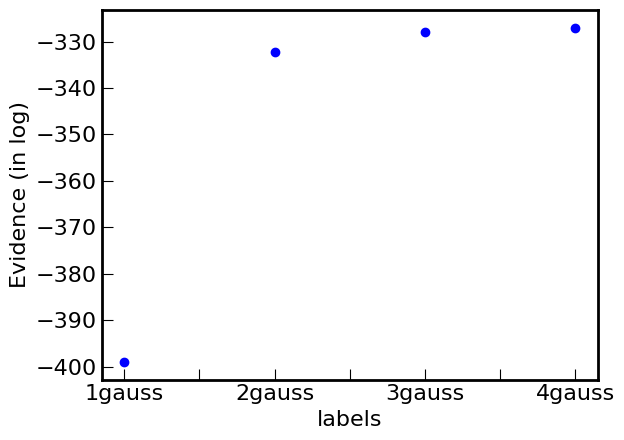

In [59]:
# Plot bayesian evidence values
df['evidence'].plot(yerr=df['evidence_err_est'],fmt='ob',linestyle= 'None')
ylabel('Evidence (in log)')

Text(0, 0.5, 'Bayesian complexity')

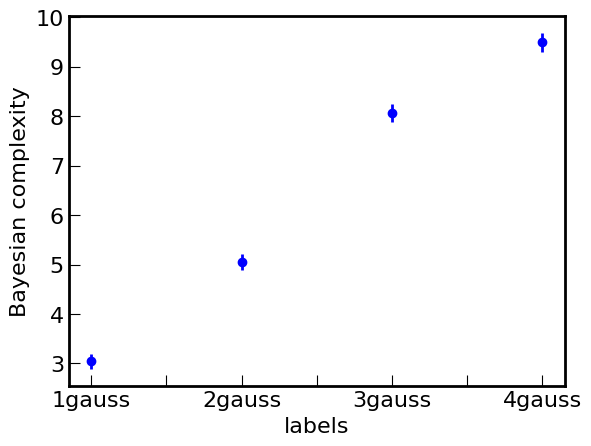

In [60]:
# Plot bayesian complexity values (effective supported parameters)
df['complexity'].plot(yerr=df['evidence_err_est'],fmt='ob',linestyle= 'None')
ylabel('Bayesian complexity')

Text(0, 0.5, 'x01 parameter value')

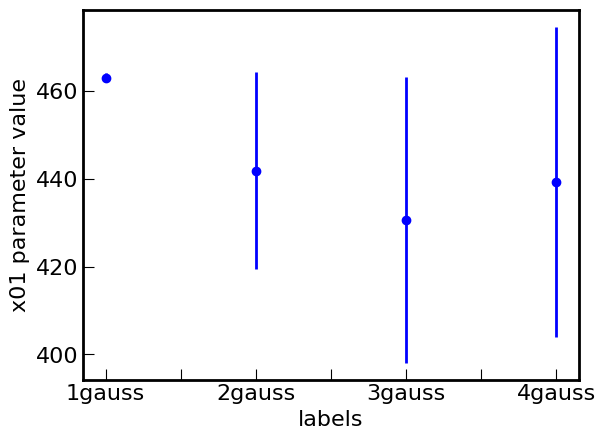

In [61]:
df['mean_x01'].plot(yerr=df['sd_x01'],fmt='ob',linestyle= 'None')
ylabel('x01 parameter value')